# Stochastic Processes

A **stochastic process** is a mathematical model used to describe the evolution over time of a system whose state is subject to random variations. 
Examples of stochastic processes are:

- <u>Stock price movement</u>: the price of a stock varies over time unpredictably, influenced by factors such as supply and demand, economic news, and investor decisions
- <u>Trajectory of a particle in a fluid</u>: a particle suspended in a fluid moves randomly due to collisions with fluid molecules
- <u>Number of customers in a queue</u>: the number of customers waiting in a queue varies over time depending on the arrival of new customers and the service rate

There are several classifications of stochastic processes, based on different characteristics:

- Discrete time vs. continuous time: depending on whether time is measured in discrete or continuous intervals
- Discrete state space vs. continuous state space: depending on whether the system can assume a finite or infinite number of states
- Markovian processes vs. non-Markovian processes: depending on whether the future of the system depends only on the present state (Markovian) or also on the past (non-Markovian)


A notable case of stachastic process is the **Gaussian stochastic process**, where any finite collection of the random variables involved in the process has a multivariate normal distribution. This means that if you take any set of $n$ random variables from the process, their joint probability distribution will be a Gaussian (or normal) distribution. This process is non-Markovian, since its behavior is completely determined by its mean function and covariance.

Key properties of Gaussian stochastic processes are:

- <u>Normality</u>: as mentioned above, the defining characteristic is that all finite combinations of the random variables are normally distributed
- <u>Complete specification by mean and covariance</u>: a Gaussian process is fully defined by its mean and covariance 


A fundamental Gaussian process, from which many other stationary processes may be derived, is the so-called **white noise process** which consists of a sequence of uncorrelated random variables, each with a zero mean and the same finite variance

## Markov Process

A **Markov process** is a mathematical system that evolves in time in such a way that the future state of the system depends only on its current state, not on its past states. This property is called the **Markov property**.


### Random Walk

A particularly interesting  example the Markov precesses is the **random walk**, which describes a path consisting of a succession of random steps. An elementary example is the random walk on integer numbers, where the next position equal to  the previous one plus a step in the up, down, left or right direction (which have the same probability to happen):

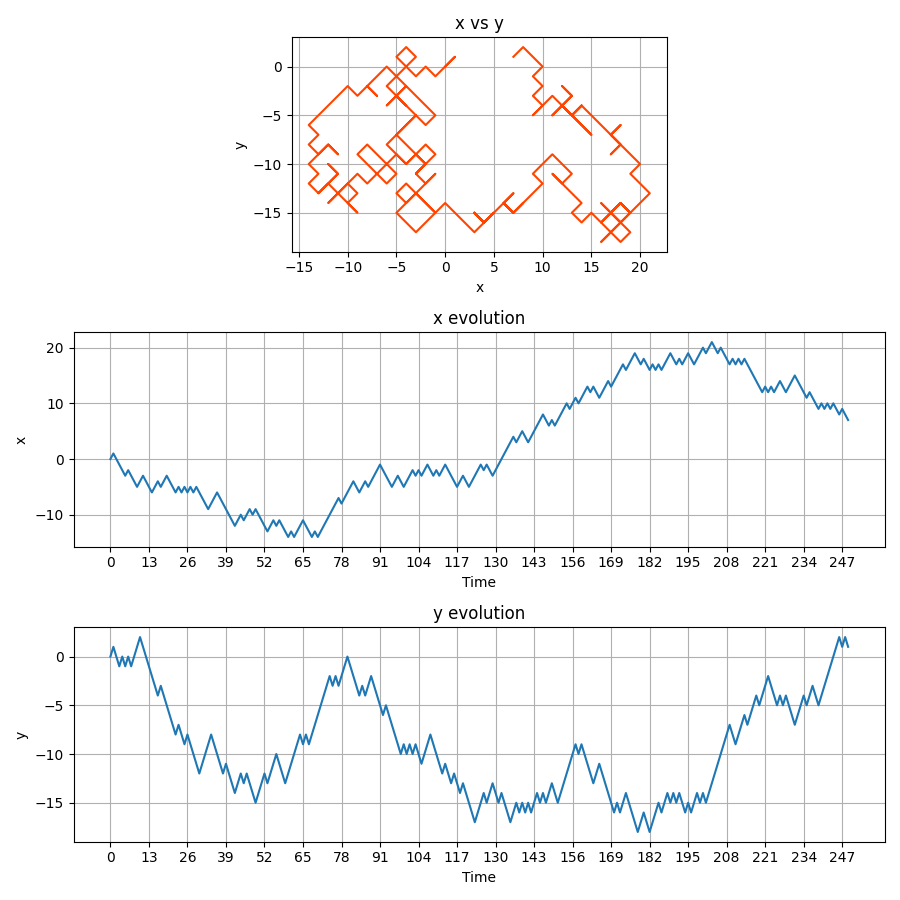

In [8]:
from statistic import *
%matplotlib widget

nSteps = 250
randomSeed = 21

PlotRandomWalk(nSteps, randomSeed)

## Gauss-Markov Process
A Gauss-Markov process is a stochastic process that combines the properties of a Gaussian process and a Markov process. In other words, it is a process in which any finite set of random variables has a joint Gaussian distribution, and the future of the process depends only on its present state (and not on its past).



### Brownian Motion

A particularly important example of a Gaussian stochastic process is **Brownian motion**, also known as the Wiener process. In this process the increments over $\Delta t$ are due to a normally distributed stochastic variable $q_k$ with zero mean and standard deviation equal to $\sqrt \Delta t$:

#### $$x_{k+1}=x_{k} + q_k $$

The increments are independent and normally distributed. Brownian motion is used to model a wide range of phenomena, including the movement of particles in a fluid and the fluctuations of stock prices.



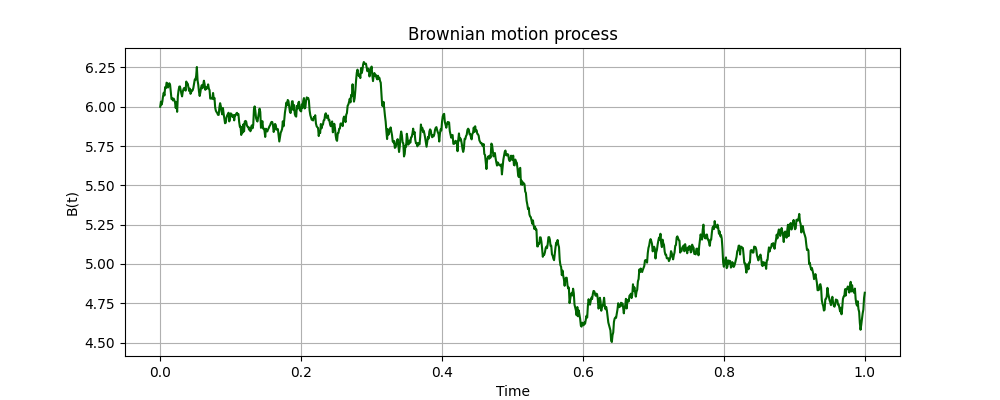

In [5]:
from statistic import *
%matplotlib widget

######## Input parameters #########
initValue = 6
T = 1.0  # duration
N = 1000  # Number of steps
###################################

PlotBrownianMotion(initValue, T, N)

## Exponentially Decaying Process

This process is used in orbit determination to model for how long the filter's correction of a state variable should be considered in absence of new measurements:


#### $$  x_{k+1}=x_k e^{-\left ( t_{k+1} - t_k\right )/\tau} +q_k \sqrt{\frac{1}{2}(1-e^{-2\left ( t_{k+1} - t_k\right )/\tau})}$$

, where:
- $u_k$ is a normally distributed stochastic value with zero mean and standard deviation equal to $\sigma$
- $\tau$ is the **half life** parameter, highlighting how long the process takes until the initial value  is reduced by an half

By manipulating $\tau$ you can:

- Force serial correlation with a very high $\tau$ (e.g., 500000)
- Force white noise with a very small $\tau$ (e.g., 0.000001)

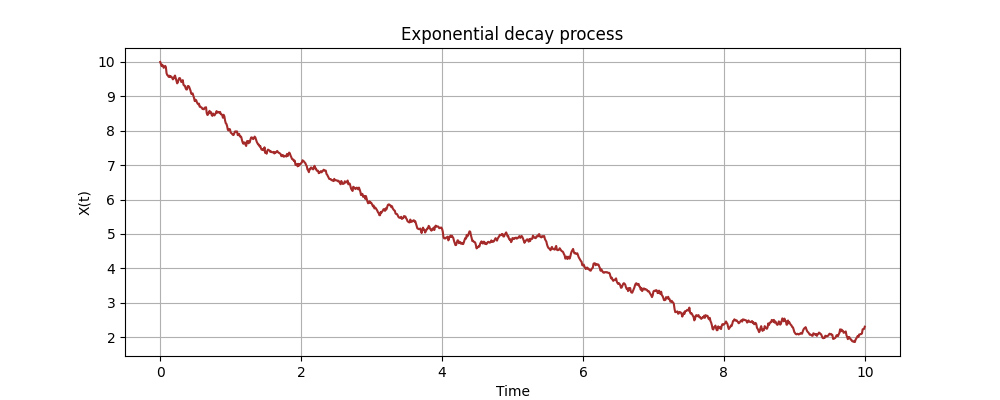

In [7]:
from statistic import *
%matplotlib widget

######## Input parameters #########
initValue = 10
T = 10    # duration
N = 1000  # Number of steps
tau = 5  #  half life
sigma = 1 # standard deviation
###################################

PlotExponentialDecay(initValue, T, N, tau, sigma)

**Observations** (or **measurements**) are random (or stochastic) variables. The **stochastic model** describes statistical characteristics of the observational errors, which are unknown for each individual measurement.

## Stochastic Model Derivation for Measurement Devices
Accordingly with the central limit theorem, which states that a large number of individual measurements having independent errors will converge to a normal (Gaussian) distribution, the performances of measuring devices (e.g. radars) can be described by using just the  **mean** $ \mu $ , and the **standard deviation** $ \sigma $.

When we have a large enough number of measurements to be statistically consistent, we can use the above values to estimate the true value (the mean) within a defined error threshold (the standard deviation).

In absence of systematic biases and outliers, the individual random errors are the deviations of repeated measurements from their mean:

#### $$e_i = y_i-\mu$$

Note as random errors are usually assumed to have a normal distribution with zero mean. Under this conditions, we can define the **variance** as

#### $$\sigma^2 = \frac{1}{m-1} \sum_{1}^{m} \left ( y_{m} - \mu \right )^{2} $$

The variance is the measure for the spread in the outcomes of the random errors, and therefore for the precision of the measurements; the standard deviation is just the positive root of the variance.


Measurement devices are not perfect in nature: they always introduce an error which deviates the measurements from the truth. Precision and accuracy depend on different types of random errors:

- **Random errors**: Stochastic errors, which are the result of (many) unknown and unpredictable sources. On average, the random errors will be zero.
- **Systematic bias**: Deterministic error which affects all or a subset of the measurements. Systematic biases may result in a constant offset in all measurements, but may also change in time. Systematic biases can be caused for instance due to malfunctioning or wrong usage of the instrument.
- **Outliers**: Deterministic errors in one of the measurements, also referred to as blunder or spurious error.

Also, we need to consider the **white noise**, which is a discrete signal whose samples are regarded as a sequence of serially uncorrelated random variables with zero mean and finite variance. It is related to the thermal effects in an electrical circuits, and is an unavoidable effect present in any measurement device.

The quality of the observations is described by the precision and accuracy:

- **Precision**: how close repeated measurements are to each other, i.e. how much repeated measurements fluctuate around their mean. The parameter to consider to evaluate the precision is the standard deviation
-  **Accuracy**: how close the result is to the true value. In this case, the systematic bias is the parameter to consider
We now execute a two-steps process to better understand the it works.

Here we simulate a set of measurements by applying a normal distribution error over the nominal (true) value. We define:

- *True Distance* as the 'perfect' distance between the measurement device and the target
- *nMeasurements* as the number of simulated measurements

Also, we characterize the performance of our sensor by defining the following:

- *1-Sigma* as the standard deviation of the measurement device
- *Sistematic Bias* a non-normally distributed error that may affect the measurement device
- *White noise* as the noise affecting the measurement device

After that, we compare the results obtained with the truth by generating an histogram and comparing it to the normal distribution curve generated from the true value and the sensor's standard deviation

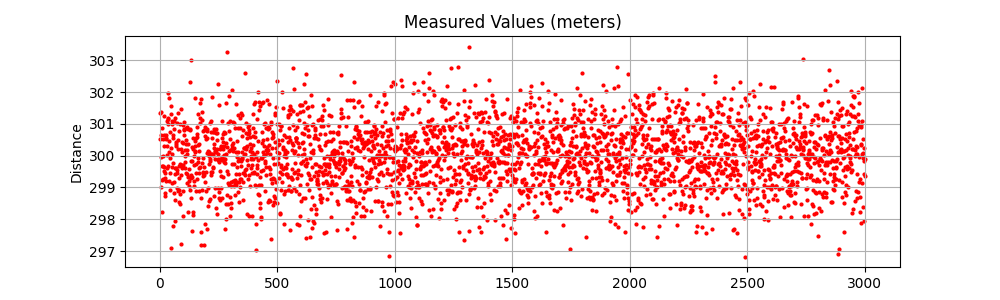

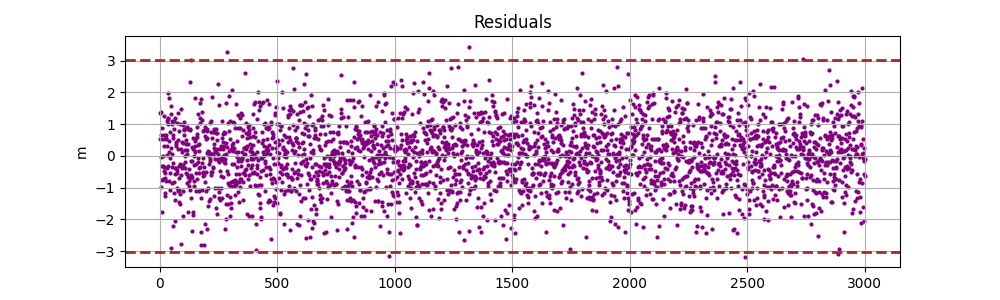

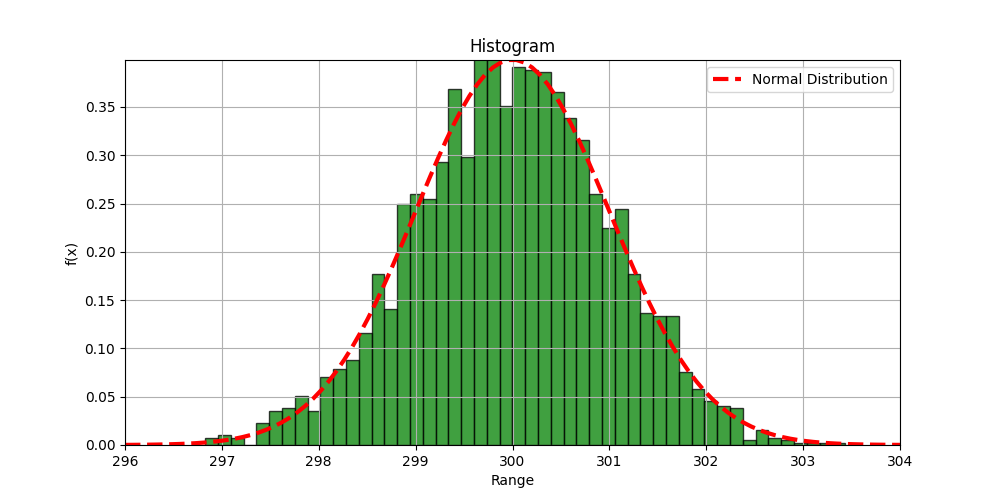

In [3]:
from statistic import *
%matplotlib widget

############## input data #################
trueDistance    = 300 # m
nMeasurements   = 3000
oneSigma        = 1 # m
sistematicError =  0 # m
whiteNoise      =  0 # m
##########################################

PlotMeasurementModel(nMeasurements, sistematicError, trueDistance, oneSigma, whiteNoise)